# Libraries

In [1]:
import sys
sys.path.append('..')  # Adds the project root to the path

%load_ext autoreload
%autoreload 2

from utils.visualization import *
import configparser

# Read the configuration file
config = configparser.ConfigParser()
config.read('/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/deep-neurosegmentation/config.ini')


# Retrieve the path for min boggle
mindboggle_path = config['DIRECTORIES']['mindboggle']
dbb_path = config['DIRECTORIES']['dbb']
dbb_augmented_path = config['DIRECTORIES']['dbb_augmented']
feta_path = config['DIRECTORIES']['feta']


# 1. Visualize MindBoggle

In [13]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(mindboggle_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

Getting a random file from directory
Random file: NKI-RS-22-9.nii.gz
------------------------------
Input path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/input/NKI-RS-22-9.nii.gz
------------------------------
Ground truth path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/ground_truth/NKI-RS-22-9.nii.gz
Segmentation path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/segmentation/NKI-RS-22-9.nii.gz




Loading nifti files..
Ground Truth Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/ground_truth/NKI-RS-22-9.nii.gz):
Shape: (192, 256, 256)
------------------------------

------------------------------
Input Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/mindboggle/input/NKI-RS-22-9.nii.gz):
Shape: (192, 256, 256)
------------------------------

------------------------------
Segmentation Data (from /rds/project/rds

Data Information

Ground Truth Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 108

Input Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 676

Segmentation Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 5






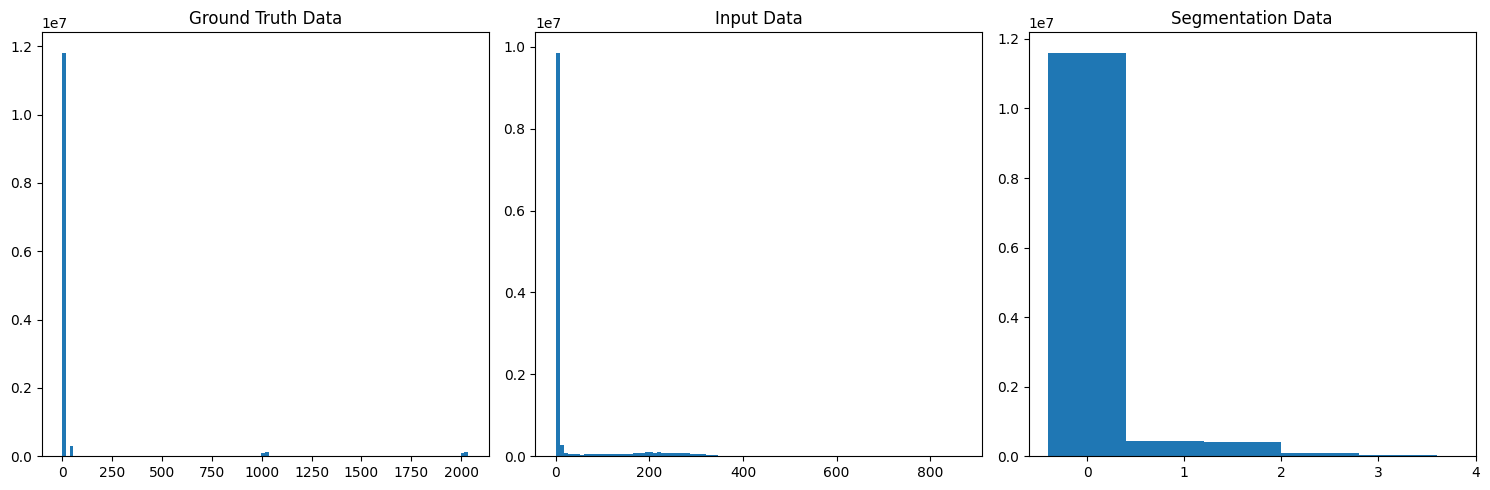

In [14]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [15]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot_mindboggle_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')
    nipy_spectral_cmap = plt.get_cmap('nipy_spectral')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=nipy_spectral_cmap)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend for 5 classes (0 = background)
    colors = [nipy_spectral_cmap(i) for i in np.linspace(0, 1, 5)]
    labels = ['Background', 'Cortical gray matter', 'Cortical White matter', 'Cerebellum gray', 'Cerebellum white']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in colors]
    fig.legend(lines, labels, loc='lower center', ncol=5)

    return fig

# Create an interactive slider for Mindboggle dataset
slice_slider_mindboggle = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_mindboggle = interactive(plot_mindboggle_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider_mindboggle)
display(interact_mindboggle)


interactive(children=(IntSlider(value=0, description='slice_idx', max=255), Output()), _dom_classes=('widget-i…

# 2. Visualize DBB

In [2]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(dbb_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

Getting a random file from directory
Random file: sub-0068_im.nii.gz
------------------------------
Input path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/dbb/input/sub-0068_im.nii.gz
------------------------------
Ground truth path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/dbb/ground_truth/sub-0068_im.nii.gz
Segmentation path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/dbb/segmentation/sub-0068_im.nii.gz




Loading nifti files..
Ground Truth Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/dbb/ground_truth/sub-0068_im.nii.gz):
Shape: (182, 218, 182)
------------------------------

------------------------------
Input Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/dbb/input/sub-0068_im.nii.gz):
Shape: (182, 218, 182)
------------------------------

------------------------------
Segmentation Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation

Data Information

Ground Truth Data:
------------------------------

------------------------------
Data Type: float64


Number of Unique Values: 7

Input Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 5192365

Segmentation Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 7






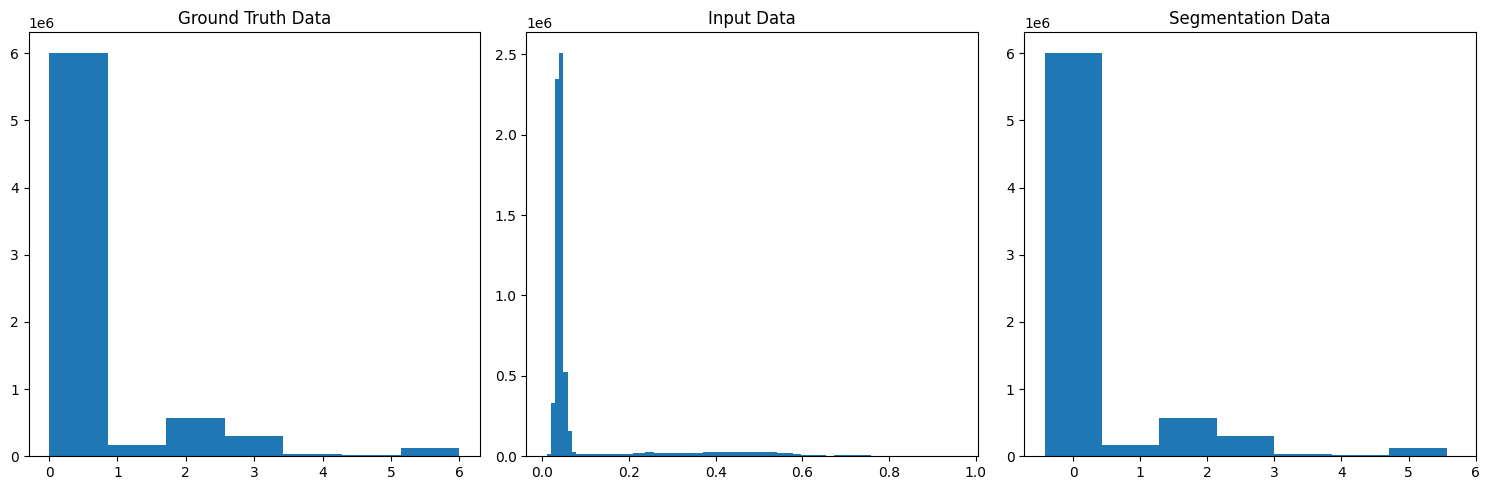

In [3]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [5]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot_dbb_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')
    nipy_spectral_cmap = plt.get_cmap('nipy_spectral')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=nipy_spectral_cmap)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend for 8 classes (0 = background)
    colors = [nipy_spectral_cmap(i) for i in np.linspace(0, 1, 8)]
    labels = ['Background', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in colors]
    fig.legend(lines, labels, loc='lower center', ncol=8)

    return fig

# Create an interactive slider for Feta dataset
slice_slider_feta = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_feta = interactive(plot_dbb_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider_feta)
display(interact_feta)


interactive(children=(IntSlider(value=0, description='slice_idx', max=181), Output()), _dom_classes=('widget-i…

# 4. Visualize Feta

In [ ]:
ground_truth_path, input_path, segmentation_path = get_random_file_paths(feta_path)
ground_truth_data, input_data, segmentation_data = load_nifti_triplet(ground_truth_path, input_path, segmentation_path)

Getting a random file from directory
Random file: sub-071_rec-irtk_T2w.nii.gz
------------------------------
Input path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/input/sub-071_rec-irtk_T2w.nii.gz
------------------------------
Ground truth path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/ground_truth/sub-071_rec-irtk_T2w.nii.gz
Segmentation path: /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/segmentation/sub-071_rec-irtk_T2w.nii.gz




Loading nifti files..
Ground Truth Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/ground_truth/sub-071_rec-irtk_T2w.nii.gz):
Shape: (256, 256, 256)
------------------------------

------------------------------
Input Data (from /rds/project/rds-7tts6phZ4tw/deep-neurosegmentation/data/processed/feta/input/sub-071_rec-irtk_T2w.nii.gz):
Shape: (256, 256, 256)
------------------------------

------------------------------
Segmentation Dat

Data Information

Ground Truth Data:
------------------------------

------------------------------
Data Type: float64


Number of Unique Values: 8

Input Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 1183188

Segmentation Data:
------------------------------

------------------------------
Data Type: float64
Number of Unique Values: 8






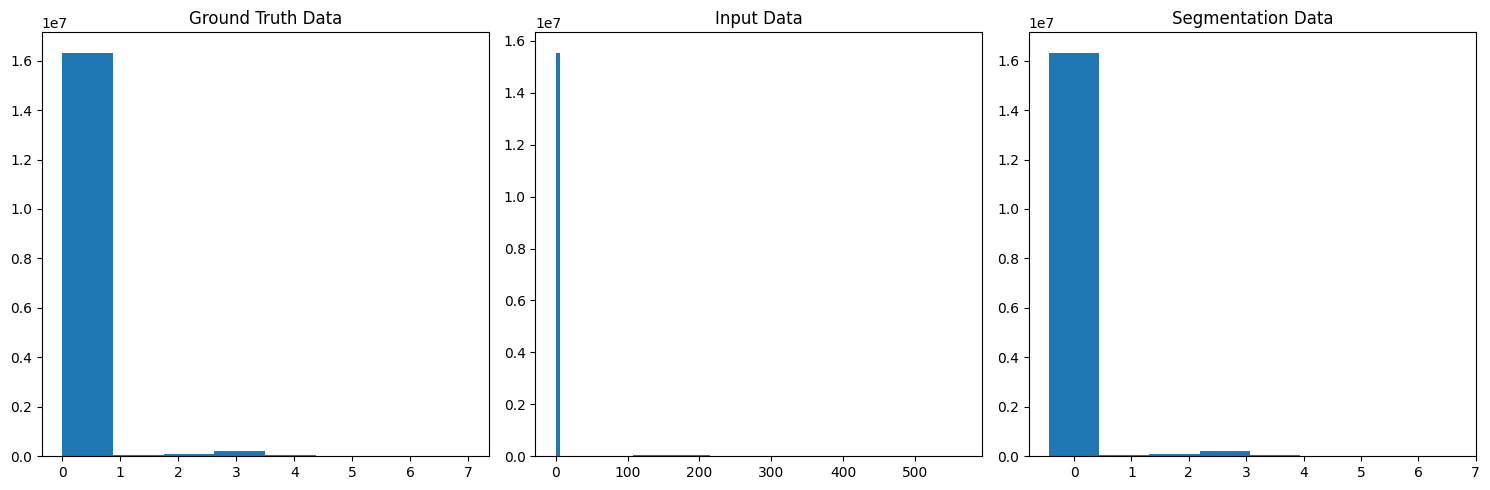

In [ ]:
# Report data information
report_data_info(ground_truth_data, input_data, segmentation_data)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot_feta_slices(ground_truth_data, input_data, segmentation_data, slice_idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get the colormap objects
    gray_cmap = plt.get_cmap('gray')
    nipy_spectral_cmap = plt.get_cmap('nipy_spectral')

    axes[0].imshow(ground_truth_data[:, :, slice_idx], cmap=gray_cmap)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')

    axes[1].imshow(input_data[:, :, slice_idx], cmap=gray_cmap)
    axes[1].set_title('Input')
    axes[1].axis('off')

    axes[2].imshow(segmentation_data[:, :, slice_idx], cmap=nipy_spectral_cmap)
    axes[2].set_title('Segmentation')
    axes[2].axis('off')

    fig.subplots_adjust(wspace=0.05)

    # Create a legend for 8 classes (0 = background)
    colors = [nipy_spectral_cmap(i) for i in np.linspace(0, 1, 8)]
    labels = ['Background', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7']
    lines = [plt.Line2D([0], [0], color=c, lw=4) for c in colors]
    fig.legend(lines, labels, loc='lower center', ncol=8)

    return fig

# Create an interactive slider for Feta dataset
slice_slider_feta = widgets.IntSlider(value=0, min=0, max=ground_truth_data.shape[2] - 1)
interact_feta = interactive(plot_feta_slices, ground_truth_data=widgets.fixed(ground_truth_data), input_data=widgets.fixed(input_data), segmentation_data=widgets.fixed(segmentation_data), slice_idx=slice_slider_feta)
display(interact_feta)


interactive(children=(IntSlider(value=0, description='slice_idx', max=255), Output()), _dom_classes=('widget-i…